In [40]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax  

## ACCEPT REJECT

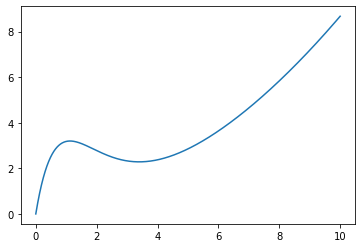

In [86]:
#function 
def PDF(x,C,b):
    return C*x*np.exp(-x)+x/b +0.07*x**2 
x = np.linspace(0,10,10000)
plt.plot(x,PDF(x,8,6))
plt.show()

In [90]:
def accept_reject_PDF(func,a,b,xmin,xmax,res) :
    """params: 
       func: function to simulate 
       args: function arguments
       return: randomly distributed numbers a
    """
    
    N_MC = res
    x = np.linspace(xmin,xmax,N_MC)
    t = np.random.uniform(xmin,xmax,N_MC)  # get uniform temporary x values
    y = np.random.uniform(xmin,xmax, N_MC) # get uniform random y values
    # accepted indeces
    idx = y <=  func(t,a,b)
    accept = y[idx]
    x_axis = t[idx]
    
    accept_prob = t[idx].size / t.size
    return accept,x_axis, accept_prob


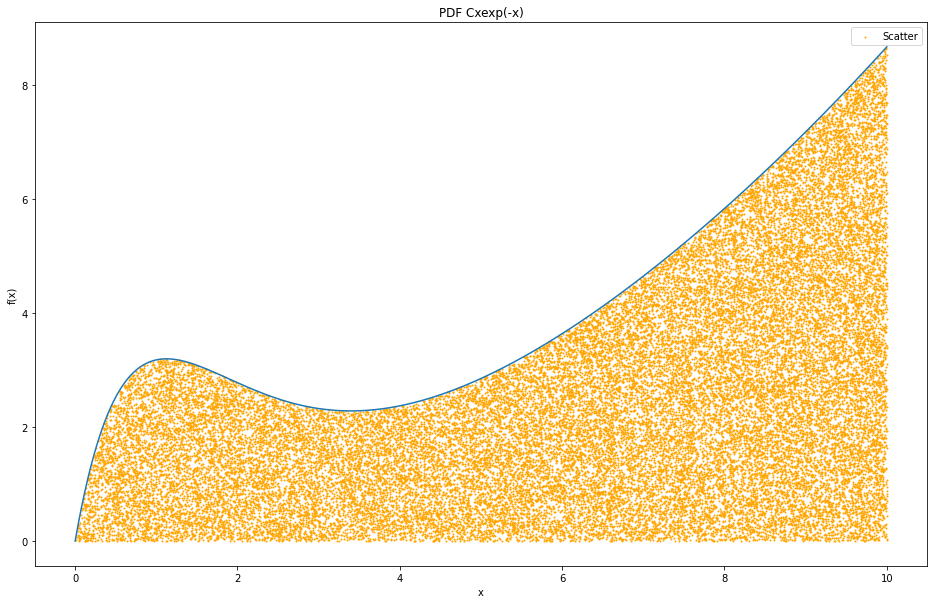

In [112]:
aprox, xscatter,rate = accept_reject_PDF(PDF,8,6,0,10,100000)
#xscatter = np.linspace(0,10,len(aprox))
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(x,PDF(x,8,6))
ax.scatter(xscatter,aprox,s=1,label='Scatter',color='orange')
#ax.hist(xscatter,bins=100, histtype='step',color='r',density=False,label='Monte Carlo')
# ax.axvline(np.mean(xscatter),color='black',label='mean')
# ax.axvline(np.median(xscatter),color='green', label='median np')
ax.set_title('PDF Cxexp(-x)')
ax.set_ylabel('f(x)')
ax.set_xlabel('x')
ax.legend()
# plt.savefig('PDF3_2')
plt.show()

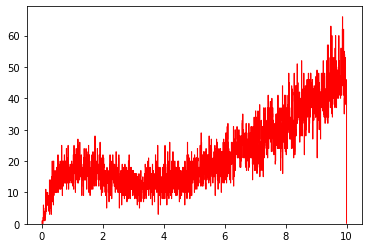

In [113]:
plt.hist(xscatter,bins=1800, histtype='step',color='r',density=False,label='Monte Carlo')
plt.show()

In [44]:
N_points = 10000  # We reduce the number of produced points in order to make scatter plot useful.

x_expcos = np.zeros(N_points)
y_expcos = np.zeros(N_points)       # We also save the y-values simply to make an illustrative scatter plot!
Ntry = 0

for i in range(N_points):
    while True:
        Ntry += 1
        x3 = -3.0*np.log(np.random.uniform(size=1))      # Expression for exponentially distributed numbers from Problem 1
        y3 =np.random.uniform(0, np.exp(-x3/3))
        if (y3 < np.exp(-x3/3)*np.cos(x3)**2) :  # If the (x,y)-point fulfills the accept condition...
            break
            
    x_expcos[i] = x3                             # ...then break and accept the x-value
    y_expcos[i] = y3

In [45]:
f  = N_points / Ntry
ef = np.sqrt(f * (1.0-f) / Ntry)

integral3  = 3.0 * f       # Multiply integral of exponential (k(x)) with fraction
eintegral3 = 3.0 * ef      # Same for error

print(f"Integral of h(x) = exp(-x/3)*cos(x)^2, x in [0,inf] is:  \t {integral3:7.4f} +- {eintegral3:6.4f}")
print(f"The efficiency of the accept/reject method used here is: \t {f:.2%} +/- {ef:.2%}")

Integral of h(x) = exp(-x/3)*cos(x)^2, x in [0,inf] is:  	  1.5348 +- 0.0107
The efficiency of the accept/reject method used here is: 	 51.16% +/- 0.36%


/tmp/ipykernel_10303/1205917341.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax3.plot(x_axis4, y_axis4,'r-', color='b', label='k(x) = exp(-x/3)')


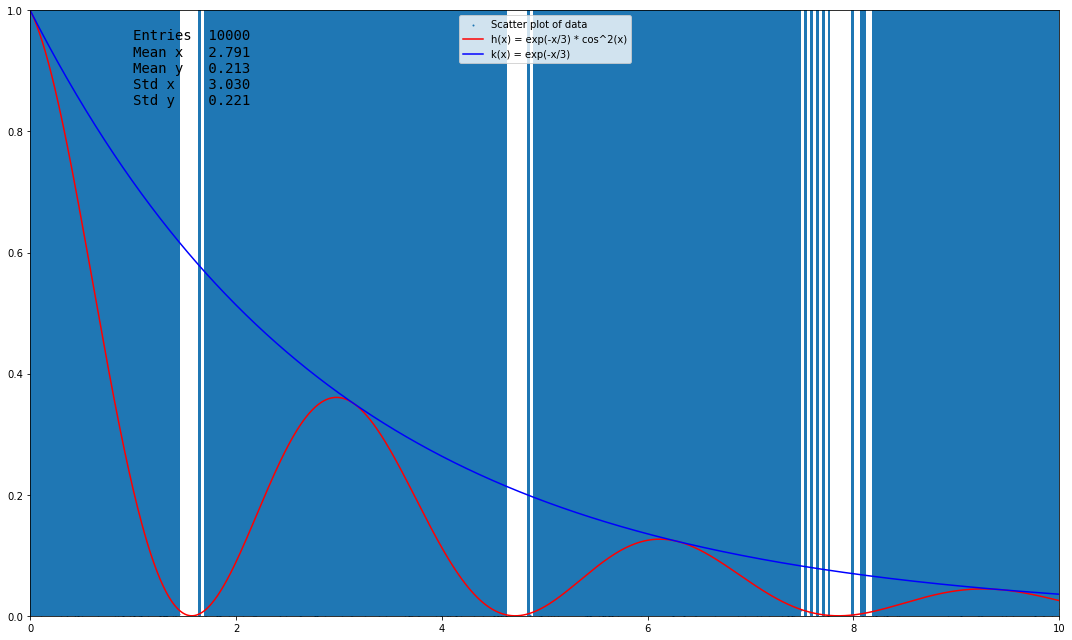

In [118]:
# Distribution of (x,y) points (for illustration) with h(x) and k(x) on top:
fig3, ax3 = plt.subplots(figsize=(15, 9))
ax3.scatter(x_expcos, y_expcos, s=1, label='Scatter plot of data')
ax3.hist(x_expcos,bins =1000)
ax3.set(xlim=(0, 10), ylim=(0, 1))

# h(x)
def expcos_func(x):
    return np.exp(-x/3)*np.cos(x)**2

# Plot h(x)
x_axis3 = np.linspace(0, 10, 1000)
y_axis3 = expcos_func(x_axis3)
ax3.plot(x_axis3, y_axis3,'r-', label='h(x) = exp(-x/3) * cos^2(x)')

# k(x)
def exp_func(x):
    return np.exp(-x/3)

# Plot k(x)
x_axis4 = np.linspace(0, 10, 1000)
y_axis4 = exp_func(x_axis4)
ax3.plot(x_axis4, y_axis4,'r-', color='b', label='k(x) = exp(-x/3)')

# Make figure text
d3 = {'Entries': len(x_expcos),
      'Mean x': x_expcos.mean(),
      'Mean y': y_expcos.mean(),
      'Std x': x_expcos.std(ddof=1),
      'Std y': y_expcos.std(ddof=1),
     }

# Add figure text
text3 = nice_string_output(d3, extra_spacing=2, decimals=3)
add_text_to_ax(0.1, 0.97, text3, ax3, fontsize=14)

# Add legend
ax3.legend(loc='best')
fig3.tight_layout()

# # Save plot
# if save_plots: 
#     fig3.savefig("HistAndFunc_expcos.pdf", dpi=600)